# Introduce

## In this notebook we will do some analysis and simple regression model based on our data which is uber and lyft fare dataset. The data is from kaggle where the main purpose and objective of this large dataset is to model how price or cab fare varies with all the features that've been given.

## Import Library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore')

This cell contains library that needed for this final project,it contain such as pandas,matplotlib,seaborn,Sklear,and we using Linear Regression as our model

# Load Dataset

In [5]:
data = pd.read_csv('rideshare_kaggle.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


This cell contains the code for importing dataset from the datasets folder and the dataset uses csv file

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

This cell contains the code for showing the info of the datasets

# Data Cleaning

calculating missing values in the dataset

In [7]:
data.isnull().sum().sum()

55095

This cell contain the code for showing the missing value in dataset

In [8]:
data.dropna(axis=0, inplace=True)

This cell contain the code for deleting the missing value in dataset

# EDA and Visualization

In [9]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,...,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,...,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,6.892028e+05,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,...,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


This cell contain the code for showing the descriptive statistic in dataset

In [10]:
data_lyft = data[data['cab_type'] == 'Lyft']
avg_price_lyft = data_lyft.groupby('distance')['price'].mean().reset_index()
avg_price_lyft

,distance,price
0,0.39,12.717054
1,0.40,12.353333
2,0.41,12.416667
3,0.42,13.042683
4,0.43,12.361111
...,...,...
508,6.09,30.083333
509,6.12,32.708333
510,6.13,28.166667
511,6.14,30.083333


This cell contain the code for showing the mean in cab type lyft based on distance and price

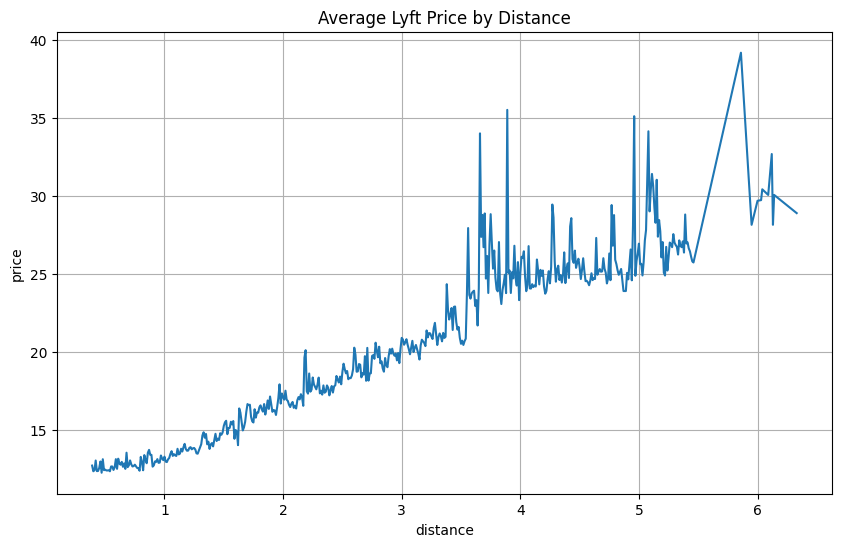

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='distance',
    y='price',
    data=avg_price_lyft
)
plt.title('Average Lyft Price by Distance')
plt.xlabel('distance')
plt.ylabel('price')
plt.grid(True)
plt.show()

This cell contain the code for visualing the mean in cab type lyft based on distance and price with line plot

In [12]:
data_uber = data[data['cab_type'] == 'Uber']
avg_price_uber = data_uber.groupby('distance')['price'].mean().reset_index()
avg_price_uber

,distance,price
0,0.02,11.850000
1,0.03,11.666667
2,0.04,12.000000
3,0.12,12.000000
4,0.17,11.583333
...,...,...
417,7.45,26.000000
418,7.46,27.374444
419,7.50,28.472222
420,7.62,28.250000


This cell contain the code for showing the mean in cab type uber based on distance and price

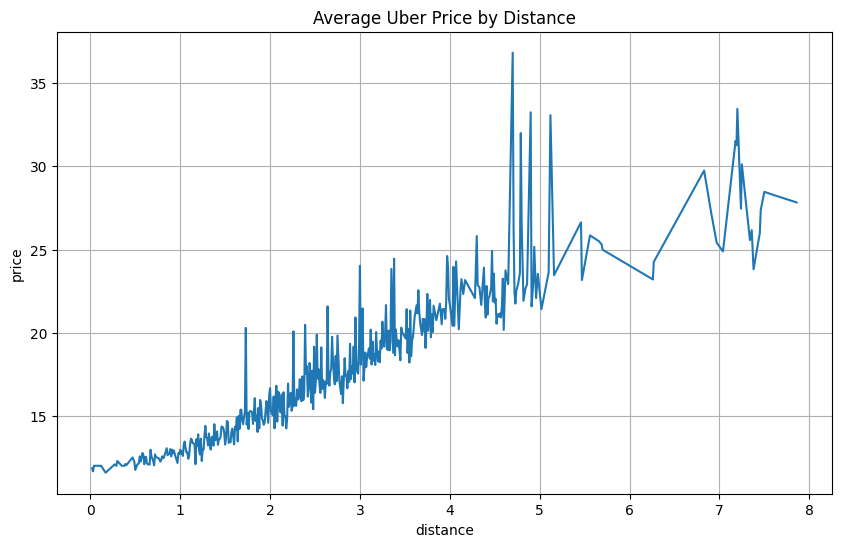

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='distance',
    y='price',
    data=avg_price_uber
)
plt.title('Average Uber Price by Distance')
plt.xlabel('distance')
plt.ylabel('price')
plt.grid(True)
plt.show()

This cell contain the code for visualing the mean in cab type uber based on distance and price with line plot

In [14]:
avg_prices = data.groupby(['distance', 'cab_type'])['price'].mean().reset_index()
avg_prices

,distance,cab_type,price
0,0.02,Uber,11.850000
1,0.03,Uber,11.666667
2,0.04,Uber,12.000000
3,0.12,Uber,12.000000
4,0.17,Uber,11.583333
...,...,...,...
930,7.45,Uber,26.000000
931,7.46,Uber,27.374444
932,7.50,Uber,28.472222
933,7.62,Uber,28.250000


This cell contain the code for showing the mean price based on distance and cab type

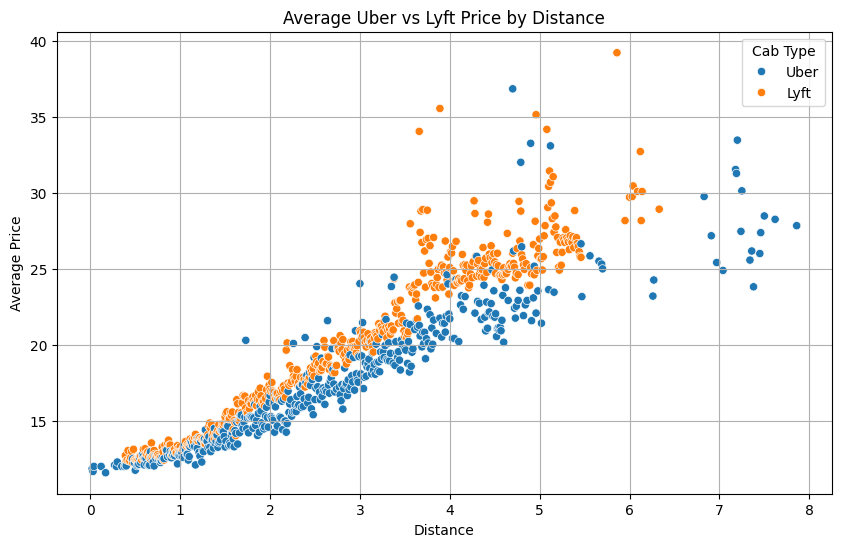

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', hue='cab_type', data=avg_prices)
plt.title('Average Uber vs Lyft Price by Distance')
plt.xlabel('Distance')
plt.ylabel('Average Price')
plt.legend(title='Cab Type')
plt.grid(True)
plt.show()

This cell contain the code for visualing the average price of uber and lyft by distance

# Data Prepocessing

# 1. Removing Unnecessary Features

First, i want to check the correlation between numeric col and target (price)

In [16]:
numeric_col = []

for col in data.columns:
    if col != 'price' and (data[col].dtype == 'int64' or data[col].dtype == 'float64'):
        numeric_col.append(col)

data[numeric_col].corrwith(data['price'])

timestamp                      0.000808
hour                           0.000561
day                           -0.000722
month                          0.000913
distance                       0.345061
surge_multiplier               0.240458
latitude                       0.002088
longitude                     -0.001417
temperature                   -0.000084
apparentTemperature           -0.000193
precipIntensity                0.000166
precipProbability             -0.000243
humidity                      -0.001238
windSpeed                      0.000990
windGust                       0.001218
windGustTime                   0.000851
visibility                     0.001497
temperatureHigh               -0.000516
temperatureHighTime            0.000759
temperatureLow                 0.000182
temperatureLowTime             0.000754
apparentTemperatureHigh       -0.000261
apparentTemperatureHighTime    0.000741
apparentTemperatureLow         0.000831
apparentTemperatureLowTime     0.000761


Second, i want to check the correlation of our categorical features with our target feature (price)

In [17]:
categorical_col = []

for col in data.select_dtypes(include='object'):
    print(f'{col} : {data[col].unique()}')
    print()
    categorical_col.append(col)

data_cat = data[categorical_col]

id : ['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '633a3fc3-1f86-4b9e-9d48-2b7132112341'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']

datetime : ['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 05:00:04' '2018-12-03 16:48:07' '2018-12-02 05:07:57']

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a

We can see that 'timezone' feature has only 1 value and 'product_id' feature contains many unidentified values. So we can remove or drop them.

In [18]:
data_cat = data_cat.drop(['timezone', 'product_id'], axis=1)

In [19]:
encode = LabelEncoder()

for col in data_cat.columns:
    data_cat[col] = encode.fit_transform(data_cat[col])
    

In [20]:
data_cat.corrwith(data['price'])

id               0.001137
datetime         0.000403
source          -0.025366
destination     -0.046320
cab_type        -0.083385
name            -0.586644
short_summary    0.001245
long_summary     0.000396
icon             0.002100
dtype: float64

As we can see that only the cab type, name, distance, and surge_multiplier columns have a strong correlation with the target (price). so I'm going to use that as a feature

In [21]:
feature = ['cab_type', 'name', 'distance', 'surge_multiplier', 'price']
new_data = data[feature]
new_data

,cab_type,name,distance,surge_multiplier,price
0,Lyft,Shared,0.44,1.0,5.0
1,Lyft,Lux,0.44,1.0,11.0
2,Lyft,Lyft,0.44,1.0,7.0
3,Lyft,Lux Black XL,0.44,1.0,26.0
4,Lyft,Lyft XL,0.44,1.0,9.0
...,...,...,...,...,...
693065,Uber,WAV,1.00,1.0,9.5
693066,Uber,UberXL,1.00,1.0,13.0
693067,Uber,UberX,1.00,1.0,9.5
693069,Uber,Black SUV,1.00,1.0,27.0


# 2. Removing Outlier

Use IQR method for checking lower and upper bound

In [22]:
Q1 = new_data['price'].quantile(0.25)
Q3 = new_data['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

Checking lower bound

In [23]:
new_data[new_data['price'] < lower_bound]

,cab_type,name,distance,surge_multiplier,price


Checking upper bound

In [24]:
new_data[new_data['price'] > upper_bound]

,cab_type,name,distance,surge_multiplier,price
706,Lyft,Lux Black,3.25,2.00,52.5
707,Lyft,Lux Black XL,3.25,2.00,67.5
769,Lyft,Lux Black XL,4.76,1.00,45.5
1094,Lyft,Lux Black XL,4.31,1.00,45.5
1318,Lyft,Lux Black XL,5.33,1.00,45.5
...,...,...,...,...,...
692439,Uber,Black SUV,5.56,1.00,47.0
692698,Lyft,Lux Black XL,4.58,1.25,52.5
692891,Lyft,Lux Black XL,5.42,1.00,47.5
692962,Uber,Black SUV,7.36,1.00,51.0


We have 5589 outlier, so we can remove them

In [25]:
new_data = new_data[new_data['price'] < upper_bound]
new_data.shape

(632387, 5)

# Modeling

# 1. Encode categorical columns

In [26]:
cat_col = ['cab_type', 'name']
encoded_data = pd.get_dummies(new_data[cat_col], prefix=cat_col)
new_data_encoded = pd.concat([new_data, encoded_data], axis=1)
new_data_encoded = new_data_encoded.drop(cat_col, axis=1)

This cell contains the code for encode cab type and name with one hot encoder

In [27]:
new_data_encoded

,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,5.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0.44,1.0,11.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,0.44,1.0,7.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.44,1.0,26.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0.44,1.0,9.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,9.5,False,True,False,False,False,False,False,False,False,False,False,False,False,True
693066,1.00,1.0,13.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
693067,1.00,1.0,9.5,False,True,False,False,False,False,False,False,False,False,False,True,False,False
693069,1.00,1.0,27.0,False,True,False,True,False,False,False,False,False,False,False,False,False,False


This cell contain the code for showing the new data that has been encoded

# 2. Split Dataset

In [28]:
X = new_data_encoded.drop(columns='price', axis=1).values
y = new_data_encoded['price'].values

This cell contain the code for splitting the dataset for our model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

This cell contain the code for defining split dataset as X_train, X_test, y_train, y_test

# Linear Regression Model

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

This cell contain the code to train the model with calling the linear regression and using it for split dataset from library

In [31]:
y_pred = model.predict(X_test)

This cell contain the code for defining the y_pred with predict model based on X_test

In [32]:
r2_score(y_test, y_pred)

0.9337792677641533

This cell contain the code for showing a result from modelling the dataset with Linear Regression

## We got our regression model with accuracy or score 93.37% based on our data which is uber and lyft fare dataset.